In [72]:
#https://github.com/krishnaik06/Dimesnsionality-Reduction/blob/master/01-Principal%20Component%20Analysis.ipynb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [73]:
from sklearn.datasets import load_breast_cancer
sheet = pd.read_csv('/Users/az/Desktop/training_data.csv')
tests = pd.read_csv('/Users/az/Desktop/test_data.csv')

/var/folders/tc/3zj6b_yn0db6yslr5bqvsvm00000gn/T/ipykernel_36995/966905595.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  sheet = pd.read_csv('/Users/az/Desktop/training_data.csv')


In [74]:
set_difference = set(sheet) - set(tests)
list_difference_result = list(set_difference)
print(list_difference_result)

['REPORT_DATE', 'service_repair']


In [75]:


print(list_difference_result)

customer = sheet.loc[:, ['Customer']]
service=sheet.loc[:,['service_repair']] #testing Var
#print (customer)

service= service.fillna(0)
print(service)

['REPORT_DATE', 'service_repair']
       service_repair
0                 0.0
1                 0.0
2                 0.0
3                 0.0
4                 0.0
...               ...
63070             0.0
63071             0.0
63072             0.0
63073             0.0
63074             0.0

[63075 rows x 1 columns]


In [76]:
#cancer = load_breast_cancer()
columns_to_drop = ['Customer', 'clli','objectName','objectType','service_repair','REPORT_DATE']


sheet = sheet.drop(columns_to_drop,axis=1)
sheet= sheet.fillna(0)



#print(sheet.loc[:, df.columns != 'Customer'])
print(sheet)

       year  month  day        date  rack  shelf  slot  port  ont  \
0      2023      7   30  2023-07-30     1      1    14     2   43   
1      2023      7   30  2023-07-30     1      1    14     2   37   
2      2023      7   30  2023-07-30     1      1    18     2   41   
3      2023      7   30  2023-07-30     1      1    13     2   10   
4      2023      7   30  2023-07-30     1      1    13     4   12   
...     ...    ...  ...         ...   ...    ...   ...   ...  ...   
63070  2023      7    7  2023-07-07     1      1     4     7    6   
63071  2023      7   31  2023-07-31     1      1     4    15   18   
63072  2023      7   30  2023-07-30     1      1     4     5   10   
63073  2023      7   15  2023-07-15     1      1     1     4    5   
63074  2023      7   20  2023-07-20     1      1     6     3   12   

       berDownstream  ...  Alarm_SECS  Session_SECS  total_stops  \
0                0.0  ...           0         86400            0   
1                0.0  ...          

In [77]:
#cancer.keys()
sheet.keys()

Index(['year', 'month', 'day', 'date', 'rack', 'shelf', 'slot', 'port', 'ont',
       'berDownstream', 'berUpstream', 'networkRxLevel', 'modelRxLevel',
       'modemTxLevel', 'distance', 'opticalTemperature', 'opticalVoltage',
       'modemType', 'status', 'ranged', 'laserBiasThreshold',
       'laserBiasCurrent', 'videoAniAgcModePlanned', 'videoAniAgcSetting',
       'videoAniOpInfoOpticalSignalLevel',
       'videoAniOpInfoOpticalSignalLevelDbm', 'videoAniOpInfoRfPowerLevel',
       'videoAniOperState', 'speedProfile', 'Stops_null', 'Stops_Admin-Reset',
       'Stops_Idle-Timeout', 'Stops_Lost-Carrier', 'Stops_Lost-Service',
       'Stops_NAS-Error', 'Stops_NAS-Request', 'Stops_Port-Error',
       'Stops_Service-Unavailable', 'Stops_Session-Timeout',
       'Stops_User-Error', 'Stops_User-Request', 'INTENT',
       'CALLCOMPLETIONREASON', 'alarms', 'Alarm_SECS', 'Session_SECS',
       'total_stops', 'TSO_calls_count', 'SA_TSO', 'score', 'TMAX', 'TMIN',
       'PRCP', 'SNOW'],
      d

In [78]:
#print(cancer)
#print(cancer['feature_names'])
#print(sheet['Customer'])

In [79]:
#lf = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#print (lf)
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])
df = pd.DataFrame(sheet)
#print(df)

In [80]:
df.head()

year  month  day        date  rack  shelf  slot  port  ont  berDownstream  \
0  2023      7   30  2023-07-30     1      1    14     2   43            0.0   
1  2023      7   30  2023-07-30     1      1    14     2   37            0.0   
2  2023      7   30  2023-07-30     1      1    18     2   41            0.0   
3  2023      7   30  2023-07-30     1      1    13     2   10            0.0   
4  2023      7   30  2023-07-30     1      1    13     4   12            0.0   

   ...  Alarm_SECS  Session_SECS  total_stops  TSO_calls_count  SA_TSO  score  \
0  ...           0         86400            0              0.0       0      3   
1  ...           0         86400            0              0.0       0      3   
2  ...           0         86400            0              0.0       0      3   
3  ...           0         86400            0              0.0       0      3   
4  ...           0         86400            0              0.0       0      3   

     TMAX   TMIN PRCP SNOW  
0  102.02  80.06  0.0  0.0  
1  102.02  80.06  0.0  0.0  
2  102.02  80.06  0.0  0.0  
3  102.02  80.06  0.0  0.0  
4  102.02  80.06  0.0  0.0  

[5 rows x 54 columns]

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
def convert_to_int(value):
    try:
        return float(value)  # Convert numeric values to int
    except:
        return sum(ord(char) for char in value)

df = df.applymap(convert_to_int)

scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [83]:
scaled_data = scaler.transform(df)

In [84]:
from sklearn.decomposition import PCA

In [85]:
pca = PCA(n_components=20)

In [86]:
pca.fit(scaled_data)

PCA(n_components=20)

In [87]:
x_pca = pca.transform(scaled_data)

In [88]:
scaled_data.shape

(63075, 54)

In [89]:
x_pca.shape

(63075, 20)

Text(0, 0.5, 'Second Principal Component')

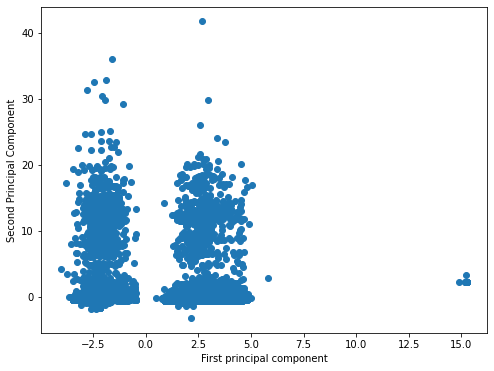

In [90]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (df,service, test_size=0.99,random_state =21)

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
log_reg=LogisticRegression(random_state = 0).fit(x_pca, service)

/Users/az/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
#log_reg.predict(X_train_s)

In [95]:
#log_reg.score(X_train_s,Y_train)

In [96]:
#log_reg.score(X_test_s,Y_test)

In [97]:
'''
def convert_to_int(value):
    try:
        return float(value)  # Convert numeric values to int
    except:
        return sum(ord(char) for char in value)

ctd=['Customer', 'clli','objectName','objectType']
tests = tests.drop(ctd,axis=1)
tests= tests.fillna(0)



dt = tests.applymap(convert_to_int)

scaler = StandardScaler()
scaler.fit(dt)
'''



"\ndef convert_to_int(value):\n    try:\n        return float(value)  # Convert numeric values to int\n    except:\n        return sum(ord(char) for char in value)\n\nctd=['Customer', 'clli','objectName','objectType']\ntests = tests.drop(ctd,axis=1)\ntests= tests.fillna(0)\n\n\n\ndt = tests.applymap(convert_to_int)\n\nscaler = StandardScaler()\nscaler.fit(dt)\n"

In [98]:
#print(log_reg.predict(dt))

In [99]:
from joblib import dump, load
dump(log_reg, 'jame.joblib') 

['jame.joblib']